In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", 
                        category=UserWarning, message=".* version 1.0.02 when using version 1.3.0.",
                        module='sklearn')
%matplotlib inline
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import missingno
from sklearn.pipeline import Pipeline
from collections import OrderedDict
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.read_csv("RBalanced_gbv_data.csv")

In [10]:
df.head(2)

,organisation_type,organisation_state,organisation_lga,location_state,location_lga,who_survivor/victim_stay_with,victim_lives_with,survivor_age,survivor_sex,marital_status,employment_status_main,employment_status_victim_main,PLWD,PLHIV,female_sex_worker,IDP,drug_user,widow,out_of_school_child,minor,household_help,child_apprentice,orphans,not_applicable,other_vulnerability,educational_status,incident_time_of_day,incident_location,sexual_assault,physical_assault,financial_economic,online_cyber,rape,defilement,forced_marriage,denial_of_resources,psychological_emotional_abuse,female_genital_mutilation,violation_property_inheritance_rights,child_abuse_neglect,other_violence,was_the_violence_fatal,perpetrator_sex,perpetrator_age,victim_perpetrator_relationship,contact_channel,who_reported_the_incident,seeks_justice,vulnerability_target,incident_year,incident_month,incident_day,reported_year,reported_month,reported_day,location_ward_encoded
0,0,970001.0,970101.0,970001.0,971102.0,-1.000000,3.000000,21.0,0,0.000000,-1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,1.000000,-1.000000,0,0,0,0,1,0,0,0,0,0,0,0,-1.00000,0.000000,1.000000,26.0,-1.000000,1.000000,1.000000,0.000000,1,2022.0,9.0,19.0,2022.0,9.0,21.0,1.000000
1,0,99.0,99.0,99.0,99.0,-0.139825,-0.339023,1.0,0,-0.294025,0.195355,-0.099031,0,0,0,0,0,0,0,0,0,0,0,0,0,0.059672,-0.067099,0.017315,0,0,0,0,0,0,0,0,0,0,0,0,0.08549,-0.022732,-0.085186,1.0,0.069183,-0.144563,-0.161968,0.008517,1,2004.0,1.0,1.0,2013.0,1.0,1.0,0.098109


In [11]:
df1 = df.copy()

In [12]:
df1.columns

Index(['organisation_type', 'organisation_state', 'organisation_lga',
       'location_state', 'location_lga', 'who_survivor/victim_stay_with',
       'victim_lives_with', 'survivor_age', 'survivor_sex', 'marital_status',
       'employment_status_main', 'employment_status_victim_main', 'PLWD',
       'PLHIV', 'female_sex_worker', 'IDP', 'drug_user', 'widow',
       'out_of_school_child', 'minor', 'household_help', 'child_apprentice',
       'orphans', 'not_applicable', 'other_vulnerability',
       'educational_status', 'incident_time_of_day', 'incident_location',
       'sexual_assault', 'physical_assault', 'financial_economic',
       'online_cyber', 'rape', 'defilement', 'forced_marriage',
       'denial_of_resources', 'psychological_emotional_abuse',
       'female_genital_mutilation', 'violation_property_inheritance_rights',
       'child_abuse_neglect', 'other_violence', 'was_the_violence_fatal',
       'perpetrator_sex', 'perpetrator_age', 'victim_perpetrator_relationship',
   

In [13]:
df1.dtypes

organisation_type                          int64
organisation_state                       float64
organisation_lga                         float64
location_state                           float64
location_lga                             float64
who_survivor/victim_stay_with            float64
victim_lives_with                        float64
survivor_age                             float64
survivor_sex                               int64
marital_status                           float64
employment_status_main                   float64
employment_status_victim_main            float64
PLWD                                       int64
PLHIV                                      int64
female_sex_worker                          int64
IDP                                        int64
drug_user                                  int64
widow                                      int64
out_of_school_child                        int64
minor                                      int64
household_help      

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
organisation_type,61350.0,0.227025,0.418912,0.0,0.000000,0.000000,0.000000,1.0
organisation_state,61350.0,407597.919446,384797.553127,99.0,99.000000,340001.000000,840001.000000,970001.0
organisation_lga,61350.0,419074.547368,395852.138610,99.0,99.000000,341115.000000,841102.000000,972102.0
location_state,61350.0,411699.849161,384536.730960,99.0,99.000000,340001.000000,840001.000000,970001.0
location_lga,61350.0,448613.681597,392223.845741,99.0,99.000000,521104.000000,841108.000000,972102.0
who_survivor/victim_stay_with,61350.0,0.774626,1.459058,-1.0,-0.153002,0.000000,2.000000,3.0
victim_lives_with,61350.0,1.155033,1.787180,-1.0,-0.352223,0.000000,2.000000,4.0
survivor_age,61350.0,19.246504,15.414235,1.0,1.000000,19.000000,31.000000,90.0
survivor_sex,61350.0,0.111475,0.314722,0.0,0.000000,0.000000,0.000000,1.0
marital_status,61350.0,0.172307,0.872892,-1.0,-0.317771,0.000000,1.000000,3.0


In [15]:
df1['vulnerability_target'].value_counts()

vulnerability_target
0    31002
1    30348
Name: count, dtype: int64

In [16]:
df1.shape

(61350, 56)

In [22]:
df.columns

Index(['organisation_type', 'organisation_state', 'organisation_lga',
       'location_state', 'location_lga', 'who_survivor/victim_stay_with',
       'victim_lives_with', 'survivor_age', 'survivor_sex', 'marital_status',
       'employment_status_main', 'employment_status_victim_main', 'PLWD',
       'PLHIV', 'female_sex_worker', 'IDP', 'drug_user', 'widow',
       'out_of_school_child', 'minor', 'household_help', 'child_apprentice',
       'orphans', 'not_applicable', 'other_vulnerability',
       'educational_status', 'incident_time_of_day', 'incident_location',
       'sexual_assault', 'physical_assault', 'financial_economic',
       'online_cyber', 'rape', 'defilement', 'forced_marriage',
       'denial_of_resources', 'psychological_emotional_abuse',
       'female_genital_mutilation', 'violation_property_inheritance_rights',
       'child_abuse_neglect', 'other_violence', 'was_the_violence_fatal',
       'perpetrator_sex', 'perpetrator_age', 'victim_perpetrator_relationship',
   

In [17]:
df1.head(2)

,organisation_type,organisation_state,organisation_lga,location_state,location_lga,who_survivor/victim_stay_with,victim_lives_with,survivor_age,survivor_sex,marital_status,employment_status_main,employment_status_victim_main,PLWD,PLHIV,female_sex_worker,IDP,drug_user,widow,out_of_school_child,minor,household_help,child_apprentice,orphans,not_applicable,other_vulnerability,educational_status,incident_time_of_day,incident_location,sexual_assault,physical_assault,financial_economic,online_cyber,rape,defilement,forced_marriage,denial_of_resources,psychological_emotional_abuse,female_genital_mutilation,violation_property_inheritance_rights,child_abuse_neglect,other_violence,was_the_violence_fatal,perpetrator_sex,perpetrator_age,victim_perpetrator_relationship,contact_channel,who_reported_the_incident,seeks_justice,vulnerability_target,incident_year,incident_month,incident_day,reported_year,reported_month,reported_day,location_ward_encoded
0,0,970001.0,970101.0,970001.0,971102.0,-1.000000,3.000000,21.0,0,0.000000,-1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,1.000000,-1.000000,0,0,0,0,1,0,0,0,0,0,0,0,-1.00000,0.000000,1.000000,26.0,-1.000000,1.000000,1.000000,0.000000,1,2022.0,9.0,19.0,2022.0,9.0,21.0,1.000000
1,0,99.0,99.0,99.0,99.0,-0.139825,-0.339023,1.0,0,-0.294025,0.195355,-0.099031,0,0,0,0,0,0,0,0,0,0,0,0,0,0.059672,-0.067099,0.017315,0,0,0,0,0,0,0,0,0,0,0,0,0.08549,-0.022732,-0.085186,1.0,0.069183,-0.144563,-0.161968,0.008517,1,2004.0,1.0,1.0,2013.0,1.0,1.0,0.098109


In [24]:
# model building

In [25]:
# =======================================
# Step 2: Prepare Data
# =======================================

# Target variable
target = "vulnerability_target"


In [26]:
# Features = all except target
X = df.drop(columns=[target])
y = df[target]

In [27]:
print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature shape: (61350, 55)
Target distribution:
 vulnerability_target
0    31002
1    30348
Name: count, dtype: int64


In [28]:
# =======================================
# Step 3: Train-Test Split
# =======================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (49080, 55)
Testing shape: (12270, 55)


In [32]:
# =======================================
# Step 1: Import Libraries
# =======================================
import pandas as pd
import numpy as np

# Scikit-learn ML tools
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# =======================================
# Step 4: Logistic Regression + Hyperparameter Tuning
# =======================================

# Pipeline: Scaling + Logistic Regression
pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logreg", LogisticRegression(solver="liblinear", max_iter=500))
])

# Hyperparameters to tune
param_grid = {
    "logreg__penalty": ["l1", "l2"],       # Regularization type
    "logreg__C": [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    "logreg__class_weight": [None, "balanced"] # Handle class balance
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1",  # F1 because we care about balance between precision & recall
    cv=cv,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV Score (F1):", grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logreg__C': 10, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}
Best CV Score (F1): 0.9287094272230817


In [37]:
# =======================================
# Step 5: Evaluation on Test Data
# =======================================

best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for AUC & confidence

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6200
           1       0.94      0.92      0.93      6070

    accuracy                           0.93     12270
   macro avg       0.93      0.93      0.93     12270
weighted avg       0.93      0.93      0.93     12270

Accuracy: 0.9317033414832926
ROC AUC: 0.9835640909815593


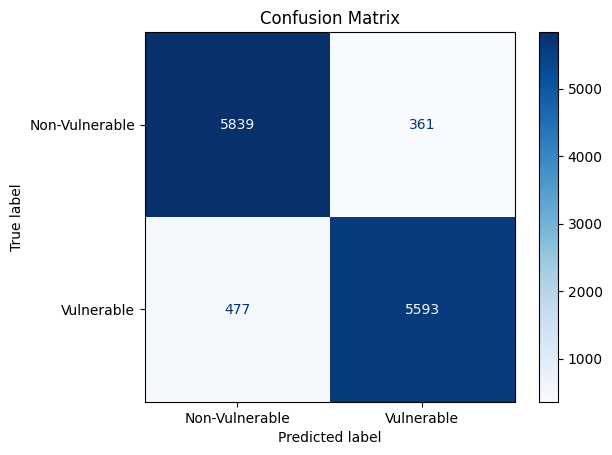

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Vulnerable", "Vulnerable"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

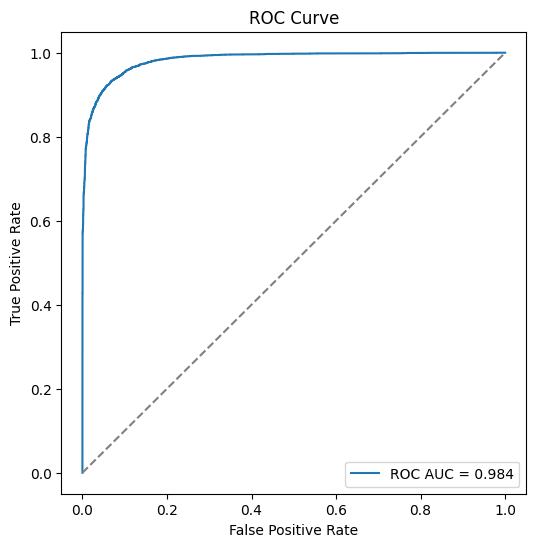

In [35]:
# =======================================
# Step 6: ROC & Precision-Recall Curves
# =======================================

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



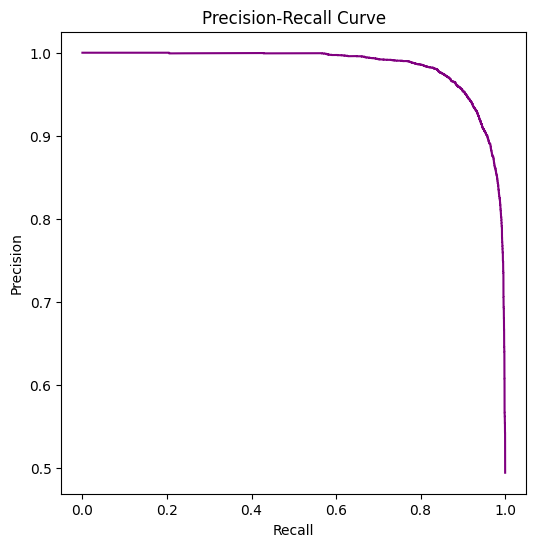

In [36]:
# Precision-Recall Curve
prec, rec, thr = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(rec, prec, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [45]:
# using threshold pf 0.4

In [44]:
# =======================================
# Step 5: Evaluation on Test Data (Custom Threshold = 0.4)
# =======================================

best_model = grid.best_estimator_

# Predicted probabilities (not hard labels yet)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Apply custom threshold = 0.4
y_pred_custom = (y_proba >= 0.4).astype(int)

# Classification Report
print("\nClassification Report (Threshold = 0.4):\n", classification_report(y_test, y_pred_custom))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_custom))

# AUC Score (threshold independent)
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)




Classification Report (Threshold = 0.4):
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6200
           1       0.92      0.94      0.93      6070

    accuracy                           0.93     12270
   macro avg       0.93      0.93      0.93     12270
weighted avg       0.93      0.93      0.93     12270

Accuracy: 0.9296658516707417
ROC AUC: 0.9835640909815593


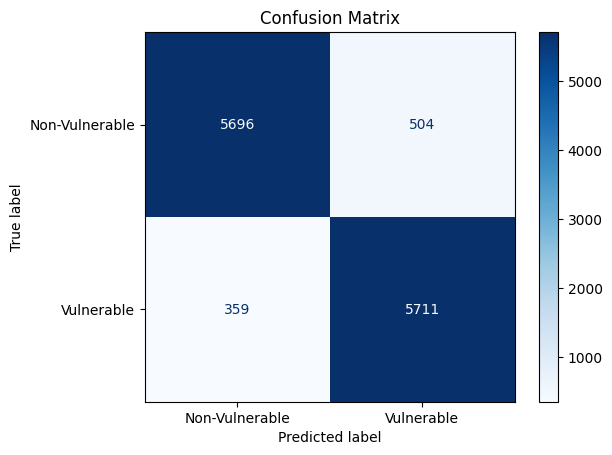

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Vulnerable", "Vulnerable"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [47]:
# feature importance

In [48]:
# =======================================
# Step 7: Feature Importance (Logistic Regression Coefficients)
# =======================================

# Extract best model (from pipeline)
best_model = grid.best_estimator_

# Get feature names (from X)
feature_names = X.columns

# Extract coefficients (from logistic regression step in pipeline)
coefficients = best_model.named_steps["logreg"].coef_[0]

# Create DataFrame
feat_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute_Importance": np.abs(coefficients)  # strength of effect
})

# Sort by absolute importance
feat_importance = feat_importance.sort_values(by="Absolute_Importance", ascending=False)

# Display top 10
print("\nTop 10 Important Features:\n", feat_importance.head(10))




Top 10 Important Features:
                           Feature  Coefficient  Absolute_Importance
8                    survivor_sex    -2.828884             2.828884
7                    survivor_age    -2.285478             2.285478
17                          widow     1.108690             1.108690
5   who_survivor/victim_stay_with    -1.021290             1.021290
48                  incident_year    -0.812887             0.812887
19                          minor     0.714320             0.714320
6               victim_lives_with    -0.668372             0.668372
25             educational_status    -0.580031             0.580031
11  employment_status_victim_main    -0.549305             0.549305
23                 not_applicable    -0.370185             0.370185


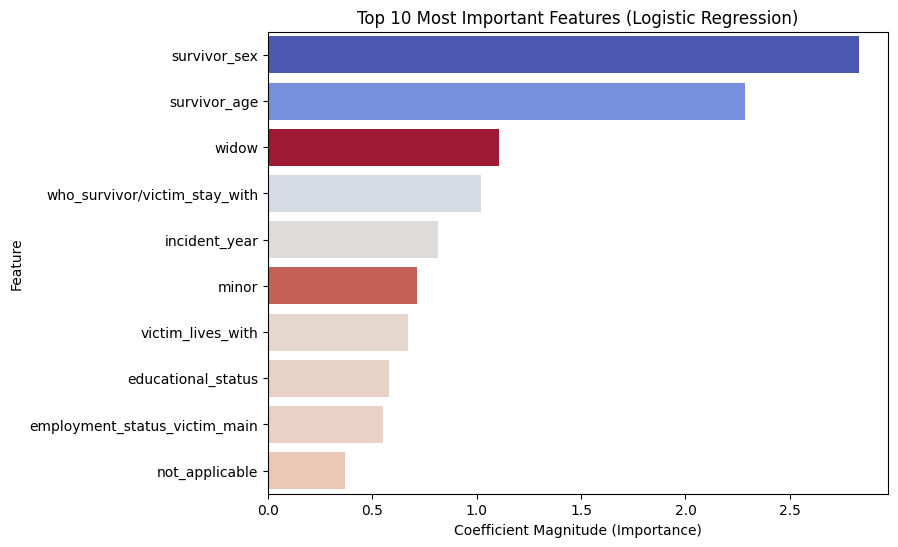

In [49]:
# Plot top 10
plt.figure(figsize=(8, 6))
sns.barplot(
    data=feat_importance.head(10), 
    x="Absolute_Importance", 
    y="Feature", 
    hue="Coefficient", 
    dodge=False,
    palette="coolwarm"
)
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.legend([],[], frameon=False)  # Hide legend for clarity
plt.show()

In [50]:
df1.head(2)

,organisation_type,organisation_state,organisation_lga,location_state,location_lga,who_survivor/victim_stay_with,victim_lives_with,survivor_age,survivor_sex,marital_status,employment_status_main,employment_status_victim_main,PLWD,PLHIV,female_sex_worker,IDP,drug_user,widow,out_of_school_child,minor,household_help,child_apprentice,orphans,not_applicable,other_vulnerability,educational_status,incident_time_of_day,incident_location,sexual_assault,physical_assault,financial_economic,online_cyber,rape,defilement,forced_marriage,denial_of_resources,psychological_emotional_abuse,female_genital_mutilation,violation_property_inheritance_rights,child_abuse_neglect,other_violence,was_the_violence_fatal,perpetrator_sex,perpetrator_age,victim_perpetrator_relationship,contact_channel,who_reported_the_incident,seeks_justice,vulnerability_target,incident_year,incident_month,incident_day,reported_year,reported_month,reported_day,location_ward_encoded
0,0,970001.0,970101.0,970001.0,971102.0,-1.000000,3.000000,21.0,0,0.000000,-1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,1.000000,-1.000000,0,0,0,0,1,0,0,0,0,0,0,0,-1.00000,0.000000,1.000000,26.0,-1.000000,1.000000,1.000000,0.000000,1,2022.0,9.0,19.0,2022.0,9.0,21.0,1.000000
1,0,99.0,99.0,99.0,99.0,-0.139825,-0.339023,1.0,0,-0.294025,0.195355,-0.099031,0,0,0,0,0,0,0,0,0,0,0,0,0,0.059672,-0.067099,0.017315,0,0,0,0,0,0,0,0,0,0,0,0,0.08549,-0.022732,-0.085186,1.0,0.069183,-0.144563,-0.161968,0.008517,1,2004.0,1.0,1.0,2013.0,1.0,1.0,0.098109


In [51]:
df1['minor'].value_counts()

minor
0    51920
1     9430
Name: count, dtype: int64

# building model using Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# STEP 2: Split train/test (different variable names than logistic regression)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
# STEP 3: Baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_rf_train, y_rf_train)

# Predictions
y_rf_pred_baseline = rf_baseline.predict(X_rf_test)
y_rf_prob_baseline = rf_baseline.predict_proba(X_rf_test)[:, 1]



In [58]:
# STEP 4: Evaluate Baseline
print("=== BASELINE RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred_baseline))
print("Precision:", precision_score(y_rf_test, y_rf_pred_baseline))
print("Recall:", recall_score(y_rf_test, y_rf_pred_baseline))
print("F1 Score:", f1_score(y_rf_test, y_rf_pred_baseline))
print("ROC-AUC:", roc_auc_score(y_rf_test, y_rf_prob_baseline))

print("\nClassification Report:\n", classification_report(y_rf_test, y_rf_pred_baseline))

=== BASELINE RANDOM FOREST ===
Accuracy: 0.9830480847595762
Precision: 0.9863923000331896
Recall: 0.9792421746293245
F1 Score: 0.9828042328042328
ROC-AUC: 0.9990087952383484

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6200
           1       0.99      0.98      0.98      6070

    accuracy                           0.98     12270
   macro avg       0.98      0.98      0.98     12270
weighted avg       0.98      0.98      0.98     12270



In [59]:
# STEP 5: Cross-validation setup
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
# STEP 6: Parameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': np.arange(100, 1001, 100),        
    'max_depth': [None] + list(np.arange(5, 51, 5)),  
    'min_samples_split': np.arange(2, 21, 2),         
    'min_samples_leaf': np.arange(1, 21, 2),          
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [68]:
# STEP 7: RandomizedSearchCV (lighter version for speed)
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=10,                 # sample only 10 random combos
    cv=3,                     
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [69]:
rf_random_search.fit(X_rf_train, y_rf_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25),
                                                      np.int64(30),
                                                      np.int64(35),
                                                      np.int64(40),
                                                      np.int64(45),
                                                      np.int64(50)],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, scoring='f1', verbose=2)

In [70]:
print("Best Parameters from RandomizedSearchCV:\n", rf_random_search.best_params_)
print("Best CV F1 Score:", rf_random_search.best_score_)

Best Parameters from RandomizedSearchCV:
 {'n_estimators': np.int64(200), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(3), 'max_features': None, 'max_depth': np.int64(15), 'class_weight': 'balanced'}
Best CV F1 Score: 0.988467294870281


In [73]:
from sklearn.model_selection import GridSearchCV

# STEP 8: Narrow down around best RandomizedSearch parameters
best_params_random = rf_random_search.best_params_

rf_param_grid = {
    'n_estimators': [
        best_params_random['n_estimators'], 
        best_params_random['n_estimators']+100
    ],
    'max_depth': [best_params_random['max_depth']],  
    'min_samples_split': [best_params_random['min_samples_split']],  
    'min_samples_leaf': [best_params_random['min_samples_leaf']],    
    'max_features': [best_params_random['max_features']],
    'class_weight': [best_params_random['class_weight']]
}



In [74]:
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=3,          # reduced for speed
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

rf_grid_search.fit(X_rf_train, y_rf_train)



Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [np.int64(15)], 'max_features': [None],
                         'min_samples_leaf': [np.int64(3)],
                         'min_samples_split': [np.int64(8)],
                         'n_estimators': [np.int64(200), np.int64(300)]},
             scoring='f1', verbose=2)

In [75]:
print("Best Parameters from GridSearchCV:\n", rf_grid_search.best_params_)
print("Best CV F1 Score:", rf_grid_search.best_score_)


Best Parameters from GridSearchCV:
 {'class_weight': 'balanced', 'max_depth': np.int64(15), 'max_features': None, 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(8), 'n_estimators': np.int64(300)}
Best CV F1 Score: 0.988468255105777


In [76]:
#model evluation

In [77]:
# STEP 10: Best tuned model
rf_best = rf_grid_search.best_estimator_

# Predictions
y_rf_pred_best = rf_best.predict(X_rf_test)
y_rf_prob_best = rf_best.predict_proba(X_rf_test)[:, 1]

In [78]:
# STEP 11: Evaluation
print("=== TUNED RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred_best))
print("Precision:", precision_score(y_rf_test, y_rf_pred_best))
print("Recall:", recall_score(y_rf_test, y_rf_pred_best))
print("F1 Score:", f1_score(y_rf_test, y_rf_pred_best))
print("ROC-AUC:", roc_auc_score(y_rf_test, y_rf_prob_best))

print("\nClassification Report:\n", classification_report(y_rf_test, y_rf_pred_best))

=== TUNED RANDOM FOREST ===
Accuracy: 0.9897310513447433
Precision: 0.9894598155467721
Recall: 0.9897858319604613
F1 Score: 0.9896227969033108
ROC-AUC: 0.9994546022213955

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6200
           1       0.99      0.99      0.99      6070

    accuracy                           0.99     12270
   macro avg       0.99      0.99      0.99     12270
weighted avg       0.99      0.99      0.99     12270



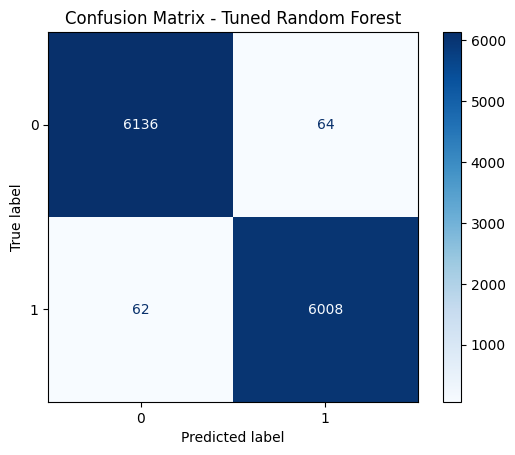

In [79]:
# STEP 12: Confusion Matrix
cm = confusion_matrix(y_rf_test, y_rf_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_best.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

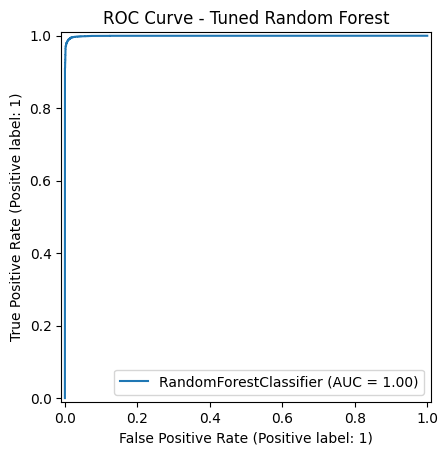

In [80]:
# STEP 13: ROC Curve
RocCurveDisplay.from_estimator(rf_best, X_rf_test, y_rf_test)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()


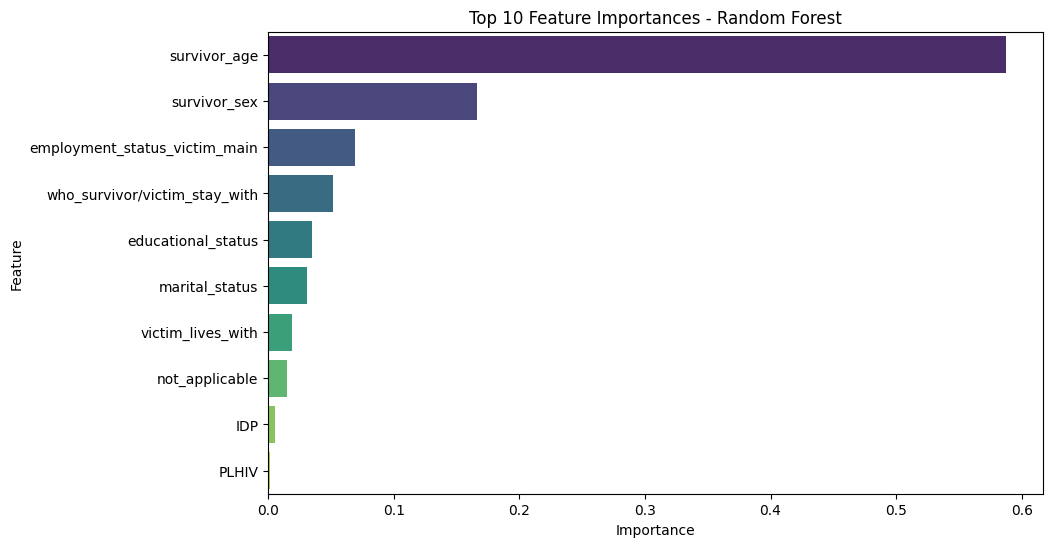

In [85]:
# STEP 14: Feature Importance
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Building model with XGBoost

In [97]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [98]:
# Step 2: Train-test split for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [99]:
# Step 3: Define baseline XGBoost model
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",  
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)


In [100]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [101]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,     
    scoring="f1",           
    cv=3,                  
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [102]:
xgb_random.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [103]:
print("Best Parameters:", xgb_random.best_params_)

best_xgb = xgb_random.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test_xgb)
y_proba_xgb = best_xgb.predict_proba(X_test_xgb)[:, 1]

# Confusion Matrix & Report
print(confusion_matrix(y_test_xgb, y_pred_xgb))
print(classification_report(y_test_xgb, y_pred_xgb))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test_xgb, y_proba_xgb))


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
[[6175   25]
 [  29 6041]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6200
           1       1.00      1.00      1.00      6070

    accuracy                           1.00     12270
   macro avg       1.00      1.00      1.00     12270
weighted avg       1.00      1.00      1.00     12270

ROC-AUC Score: 0.9998496572248499


In [104]:
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test_xgb, y_pred_xgb))


Confusion Matrix (XGBoost):
[[6175   25]
 [  29 6041]]


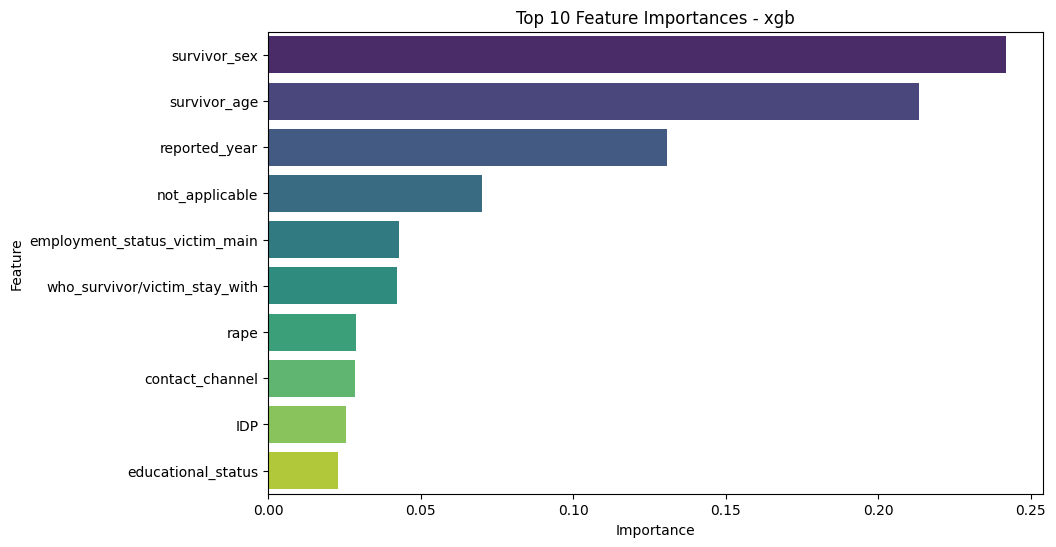

In [107]:
# STEP 14: Feature Importance
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances - xgb")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#

# building model with catboost

In [110]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

In [111]:
# Step 2: Train-test split for CatBoost
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [112]:
# Step 3: Define baseline CatBoost model
cat_model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    iterations=500,            # not too big, will stop early
    learning_rate=0.05,
    depth=6,
    early_stopping_rounds=50,
    verbose=0                  # silent mode (no long logs)
)


In [113]:
# Step 4: Define smaller parameter grid for faster tuning
cat_param_grid = {
    "depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "l2_leaf_reg": [3, 5],
    "iterations": [300, 500]
}

# Stratified K-Fold CV (reduced folds for speed)
cat_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
cat_grid = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    cv=cat_cv,
    scoring="f1",   # balance between precision & recall
    n_jobs=-1,
    verbose=1
)

# Fit
cat_grid.fit(X_train_cat, y_train_cat)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C3DD4E11F0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'iterations': [300, 500],
                         'l2_leaf_reg': [3, 5], 'learning_rate': [0.05, 0.1]},
             scoring='f1', verbose=1)

In [114]:
# Step 5: Best parameters
print("Best Parameters for CatBoost:", cat_grid.best_params_)

# Best model
cat_best = cat_grid.best_estimator_

Best Parameters for CatBoost: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [115]:
# Step 6: Predictions
y_pred_cat = cat_best.predict(X_test_cat)
y_proba_cat = cat_best.predict_proba(X_test_cat)[:, 1]

# Classification report
print("Classification Report for CatBoost:\n", classification_report(y_test_cat, y_pred_cat))


Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6200
           1       1.00      1.00      1.00      6070

    accuracy                           1.00     12270
   macro avg       1.00      1.00      1.00     12270
weighted avg       1.00      1.00      1.00     12270



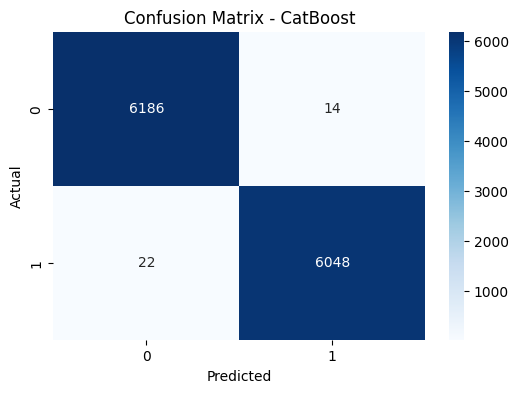

In [116]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cat, y_pred_cat), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC-AUC Score: 0.9999370516022745


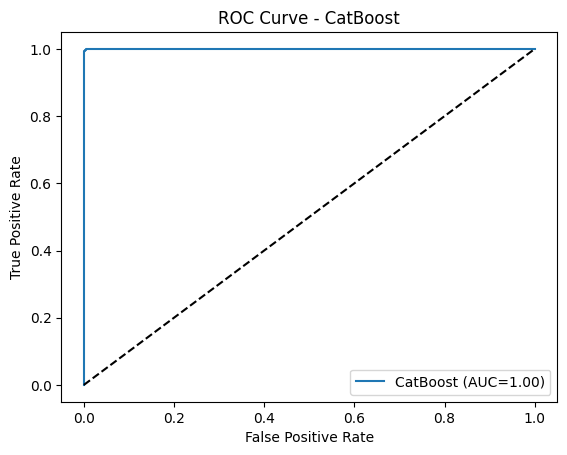

In [117]:
# ROC-AUC
roc_auc_cat = roc_auc_score(y_test_cat, y_proba_cat)
print("ROC-AUC Score:", roc_auc_cat)

fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_cat, y_proba_cat)
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC={roc_auc_cat:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.show()

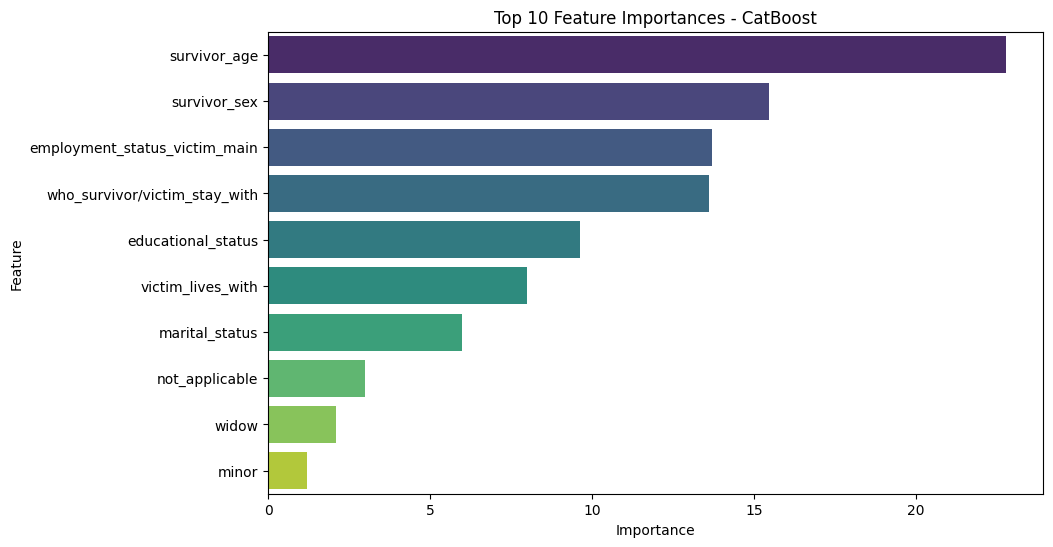

In [121]:
# Step 7: Feature importance
importances_cat = cat_best.get_feature_importance()
feat_imp_cat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_cat
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_cat.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances - CatBoost")
plt.show()


In [119]:
df1['not_applicable'].value_counts()

not_applicable
0    39977
1    21373
Name: count, dtype: int64

In [123]:
df1['minor'].value_counts()

minor
0    51920
1     9430
Name: count, dtype: int64

# create a mini predictive model

In [158]:
import shap
import ipywidgets as widgets
from IPython.display import display

In [159]:

# STEP 1: Define top 7 features
top_features = [
    "survivor_age",
    "survivor_sex",
    "employment_status_victim_main",
    "who_survivor/victim_stay_with",
    "educational_status",
    "marital_status",
    "victim_lives_with"
]

# Retrain RF with only top 7 features
X_top = X[top_features]
rf_best.fit(X_top, y)

# STEP 2: Define categorical mappings
mappings = {
    "survivor_sex": {"Female": 0, "Male": 1},
    
    "employment_status_victim_main": {
        "Unemployed": 0,
        "Currently employed": 1,
        "Self employed": 2,
        "Not reported": 3,
        "Unknown": -1
    },
    
    "who_survivor/victim_stay_with": {
        "Alone": 0,
        "Parent": 1,
        "Guardian": 2,
        "Partner": 3,
        "Unknown": -1
    },
    
    "educational_status": {
        "No formal": 0,
        "Some primary": 1,
        "Completed primary": 2,
        "Some secondary": 3,
        "Completed secondary": 4,
        "Undergraduate": 5,
        "Graduate": 6,
        "Postgraduate": 7,
        "Diploma": 8,
        "Unknown": -1
    },
    
    "marital_status": {
        "Single": 0,
        "Married": 1,
        "Divorced": 2,
        "Widowed": 3,
        "Unknown": -1
    },
    
    "victim_lives_with": {
        "Alone": 0,
        "Family": 1,
        "Friends": 2,
        "Partner": 3,
        "Unknown": -1
    }
}



In [160]:
# STEP 3: Mini Predictive System with SHAP
def mini_predictive_system_with_dropdowns(model, top_features, mappings):
    print("\n=== PREDICTIVE SYSTEM WITH SHAP ===")
    
    # Widgets for input
    inputs = {}
    
    for feature in top_features:
        if feature == "survivor_age":
            inputs[feature] = widgets.IntText(
                description="Age:",
                value=25,
                min=0,
                max=100
            )
        elif feature in mappings:
            inputs[feature] = widgets.Dropdown(
                options=list(mappings[feature].keys()),
                description=feature[:12] + "..."
            )
        else:
            inputs[feature] = widgets.IntText(
                description=feature,
                value=0
            )
    
    # Button to trigger prediction
    button = widgets.Button(description="Predict GBV Vulnerability", button_style='success')
    output = widgets.Output()
    
    def on_button_click(b):
        with output:
            output.clear_output()
            
            # Collect values & encode categories
            user_data = []
            for feature in top_features:
                val = inputs[feature].value
                if feature in mappings:
                    val = mappings[feature][val]
                user_data.append(val)
            
            # Create DataFrame
            user_df = pd.DataFrame([user_data], columns=top_features)
            
            # Prediction
            pred_class = model.predict(user_df)[0]
            pred_proba = model.predict_proba(user_df)[0]
            confidence = round(pred_proba[pred_class] * 100, 2)
            
            # Output result
            print("\nPrediction Result:")
            if pred_class == 1:
                print(f" Vulnerability to GBV detected with {confidence}% confidence")
            else:
                print(f" Not Vulnerability to GBV with {confidence}% confidence")
            
            print(f"\nProbability Breakdown:")
            print(f"Class 0 (Not Vulnerability): {round(pred_proba[0]*100,2)}%")
            print(f"Class 1 (Vulnerability): {round(pred_proba[1]*100,2)}%")
            
            # SHAP explanation
            print("\nGenerating SHAP explanation...")
            explainer = shap.TreeExplainer(model)
            shap_values = explainer(user_df)
            
            shap.initjs()
            display(shap.force_plot(explainer.expected_value[1], 
                                    shap_values.values[0,:,1], 
                                    user_df.iloc[0,:]))
        
    
    button.on_click(on_button_click)
    
    # Display form
    display(*inputs.values(), button, output)



In [161]:
# STEP 4: Run predictive system with dropdowns
mini_predictive_system_with_dropdowns(rf_best, top_features, mappings)



=== PREDICTIVE SYSTEM WITH SHAP ===


IntText(value=25, description='Age:')

Dropdown(description='survivor_sex...', options=('Female', 'Male'), value='Female')

Dropdown(description='employment_s...', options=('Unemployed', 'Currently employed', 'Self employed', 'Not rep…

Dropdown(description='who_survivor...', options=('Alone', 'Parent', 'Guardian', 'Partner', 'Unknown'), value='…

Dropdown(description='educational_...', options=('No formal', 'Some primary', 'Completed primary', 'Some secon…

Dropdown(description='marital_stat...', options=('Single', 'Married', 'Divorced', 'Widowed', 'Unknown'), value…

Dropdown(description='victim_lives...', options=('Alone', 'Family', 'Friends', 'Partner', 'Unknown'), value='A…

Button(button_style='success', description='Predict GBV Vulnerability', style=ButtonStyle())

Output()

In [162]:
#saving the model

In [163]:
import joblib

In [166]:
joblib.dump(rf_best, "gbv_model.pkl")
print("model saved successfully as gbv_model.pkl")

model saved successfully as gbv_model.pkl
